In [240]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [241]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [242]:
dff=pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [243]:
df=dff.copy()

In [244]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [246]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Preprocessing

### 1.Age 

In [247]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [248]:
df["age"].max(),df["age"].min()

(64, 18)

In [249]:
df["age_group"]=pd.cut(df["age"],labels=["young","mid","old"],bins=3)

In [250]:
df.groupby("age_group")["charges"].mean()

/tmp/ipykernel_24/2128036501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["charges"].mean()


age_group
young     9576.862814
mid      13679.490091
old      17549.565914
Name: charges, dtype: float64

In [251]:
custom={
    "young":0,
    "mid":1,
    "old":2
}

df["age_group"]=df["age_group"].values.map(custom)

/tmp/ipykernel_24/531047743.py:7: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  df["age_group"]=df["age_group"].values.map(custom)


In [252]:
df.drop("age",axis=1,inplace=True)
df.head()

,sex,bmi,children,smoker,region,charges,age_group
0,female,27.900,0,yes,southwest,16884.92400,0
1,male,33.770,1,no,southeast,1725.55230,0
2,male,33.000,3,no,southeast,4449.46200,0
3,male,22.705,0,no,northwest,21984.47061,0
4,male,28.880,0,no,northwest,3866.85520,0


### 2. Sex Column

In [253]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [254]:
df["encoded_sex"]=pd.get_dummies(df["sex"],drop_first=True,dtype=int)
df.head()

,sex,bmi,children,smoker,region,charges,age_group,encoded_sex
0,female,27.900,0,yes,southwest,16884.92400,0,0
1,male,33.770,1,no,southeast,1725.55230,0,1
2,male,33.000,3,no,southeast,4449.46200,0,1
3,male,22.705,0,no,northwest,21984.47061,0,1
4,male,28.880,0,no,northwest,3866.85520,0,1


In [255]:
df.drop("sex",axis=1,inplace=True)
df.head()

,bmi,children,smoker,region,charges,age_group,encoded_sex
0,27.900,0,yes,southwest,16884.92400,0,0
1,33.770,1,no,southeast,1725.55230,0,1
2,33.000,3,no,southeast,4449.46200,0,1
3,22.705,0,no,northwest,21984.47061,0,1
4,28.880,0,no,northwest,3866.85520,0,1


### 3. Somker

In [256]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [257]:
df["encoded_smoker"]=pd.get_dummies(df["smoker"],drop_first=True,dtype=int)
df.head()

,bmi,children,smoker,region,charges,age_group,encoded_sex,encoded_smoker
0,27.900,0,yes,southwest,16884.92400,0,0,1
1,33.770,1,no,southeast,1725.55230,0,1,0
2,33.000,3,no,southeast,4449.46200,0,1,0
3,22.705,0,no,northwest,21984.47061,0,1,0
4,28.880,0,no,northwest,3866.85520,0,1,0


In [258]:
df.drop("smoker",axis=1,inplace=True)
df.head()

,bmi,children,region,charges,age_group,encoded_sex,encoded_smoker
0,27.900,0,southwest,16884.92400,0,0,1
1,33.770,1,southeast,1725.55230,0,1,0
2,33.000,3,southeast,4449.46200,0,1,0
3,22.705,0,northwest,21984.47061,0,1,0
4,28.880,0,northwest,3866.85520,0,1,0


### 3. Region

In [259]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [260]:
lb=LabelEncoder()
df["encoded_region"]=lb.fit_transform(df["region"])
df.head()

,bmi,children,region,charges,age_group,encoded_sex,encoded_smoker,encoded_region
0,27.900,0,southwest,16884.92400,0,0,1,3
1,33.770,1,southeast,1725.55230,0,1,0,2
2,33.000,3,southeast,4449.46200,0,1,0,2
3,22.705,0,northwest,21984.47061,0,1,0,1
4,28.880,0,northwest,3866.85520,0,1,0,1


In [261]:
df.drop("region",axis=1,inplace=True)

In [262]:
df.head()

,bmi,children,charges,age_group,encoded_sex,encoded_smoker,encoded_region
0,27.900,0,16884.92400,0,0,1,3
1,33.770,1,1725.55230,0,1,0,2
2,33.000,3,4449.46200,0,1,0,2
3,22.705,0,21984.47061,0,1,0,1
4,28.880,0,3866.85520,0,1,0,1


In [263]:
df.corr()

,bmi,children,charges,age_group,encoded_sex,encoded_smoker,encoded_region
bmi,1.000000,0.012759,0.198341,0.103083,0.046371,0.003750,0.157566
children,0.012759,1.000000,0.067998,0.023428,0.017163,0.007673,0.016569
charges,0.198341,0.067998,1.000000,0.274376,0.057292,0.787251,-0.006208
age_group,0.103083,0.023428,0.274376,1.000000,-0.018722,-0.036656,-0.001848
encoded_sex,0.046371,0.017163,0.057292,-0.018722,1.000000,0.076185,0.004588
encoded_smoker,0.003750,0.007673,0.787251,-0.036656,0.076185,1.000000,-0.002181
encoded_region,0.157566,0.016569,-0.006208,-0.001848,0.004588,-0.002181,1.000000


<Axes: >

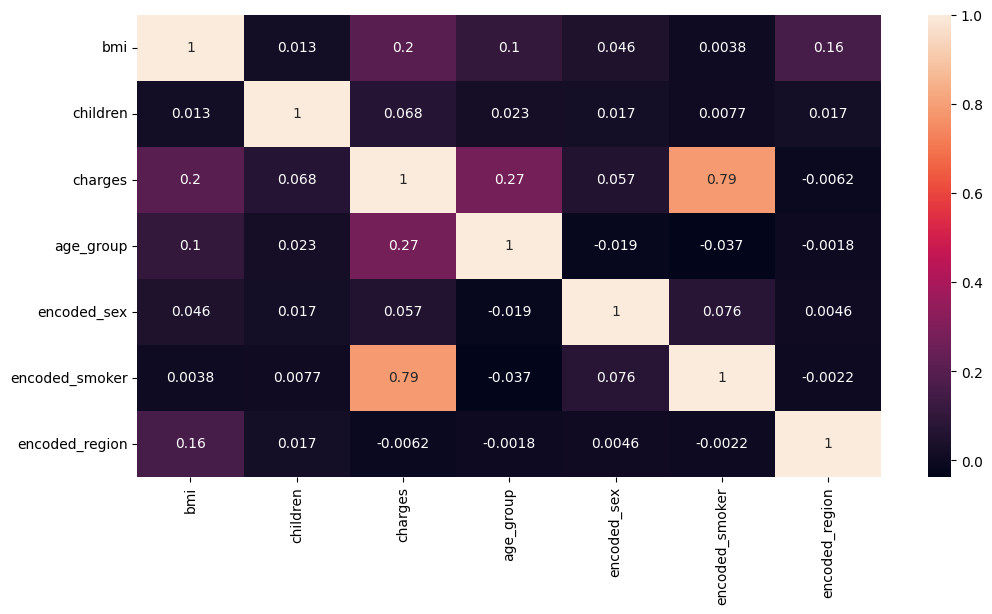

In [264]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [265]:
df.columns

Index(['bmi', 'children', 'charges', 'age_group', 'encoded_sex',
       'encoded_smoker', 'encoded_region'],
      dtype='object')

In [266]:
x=df[['bmi', 'children', 'age_group', 'encoded_sex',
       'encoded_smoker', 'encoded_region']]
y=df["charges"]

In [267]:
x.shape

(1338, 6)

In [268]:
x.corrwith(df["charges"])

bmi               0.198341
children          0.067998
age_group         0.274376
encoded_sex       0.057292
encoded_smoker    0.787251
encoded_region   -0.006208
dtype: float64

Text(0, 0.5, 'Corr with Target')

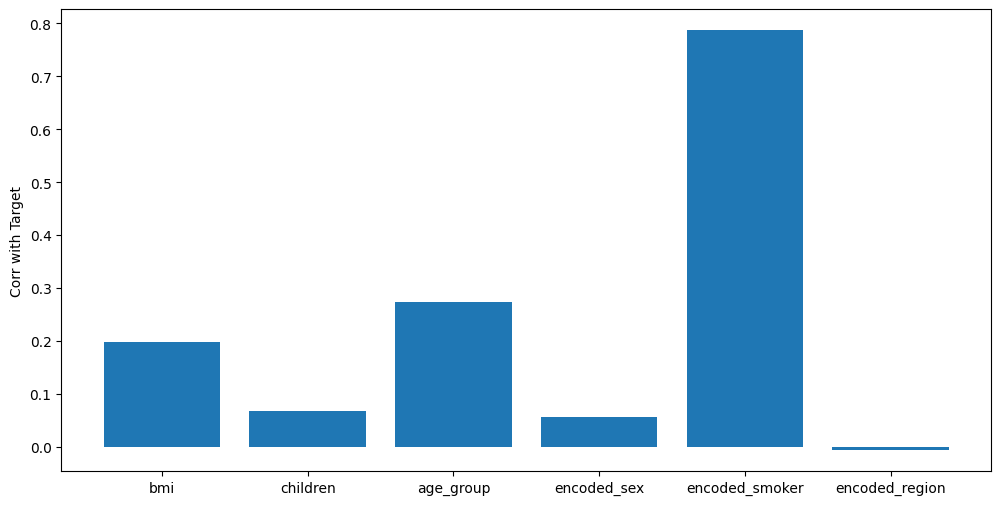

In [269]:
plt.figure(figsize=(12,6))
plt.bar(x=['bmi', 'children', 'age_group', 'encoded_sex',
       'encoded_smoker', 'encoded_region'],height=x.corrwith(df["charges"]))
plt.ylabel("Corr with Target")

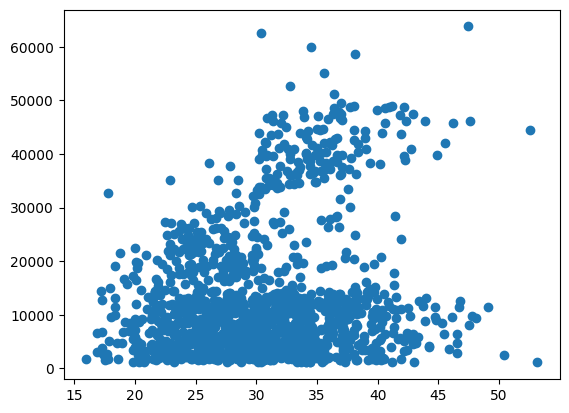

In [270]:
plt.scatter(df["bmi"],df["charges"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

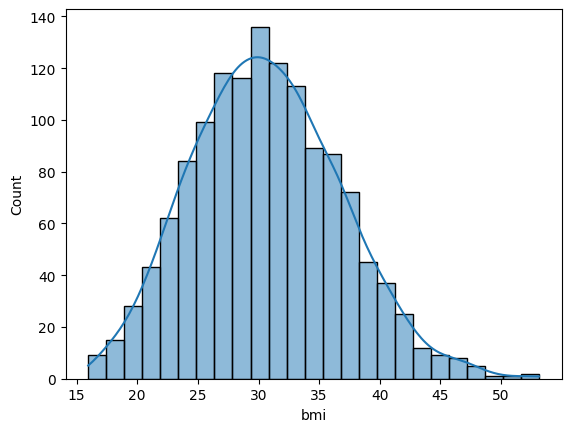

In [271]:
sns.histplot(df['bmi'],kde=True)

# Model Building

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13,test_size=.1)

In [273]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [274]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

0.808633780324849

In [275]:
rd=Ridge()
rd.fit(x_train_scaled,y_train)
rd.score(x_test_scaled,y_test)

0.8086139105347038

In [276]:
la=Lasso()
la.fit(x_train_scaled,y_train)
la.score(x_test_scaled,y_test)

0.8086359162000654

In [277]:
x2=df[['bmi', 'children', 'age_group', 'encoded_sex',
       'encoded_smoker']]
y2=df["charges"]


x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,random_state=13,test_size=.1)
sc2=StandardScaler()
x_train_scaled2=sc2.fit_transform(x_train2)
x_test_scaled2=sc2.fit_transform(x_test2)

In [278]:
lr2=LinearRegression()
lr2.fit(x_train_scaled2,y_train2)
print("Linear2:",lr2.score(x_test_scaled2,y_test2))

rd2=Ridge()
rd2.fit(x_train_scaled2,y_train2)
print("Ridge2:",rd2.score(x_test_scaled2,y_test2))

la2=Lasso()
la2.fit(x_train_scaled2,y_train2)
print("Lasso2:",la2.score(x_test_scaled2,y_test2))

Linear2: 0.8063790389334946
Ridge2: 0.806364309786444
Lasso2: 0.806387278040294


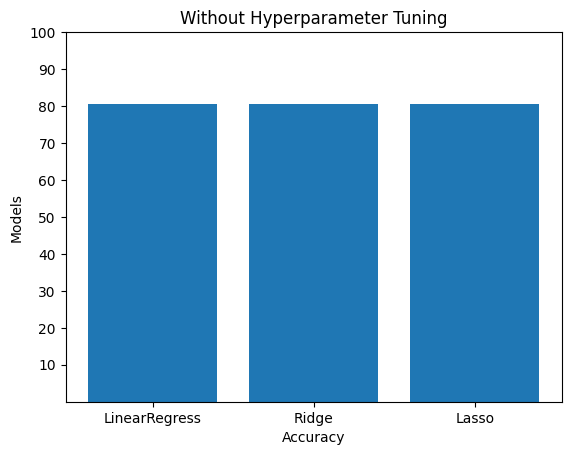

In [292]:
plt.title("Without Hyperparameter Tuning")
plt.bar(x=["LinearRegress","Ridge","Lasso"],height=[lr2.score(x_test_scaled2,y_test2)*100,
                                                    rd2.score(x_test_scaled2,y_test2)*100,
                                                    la2.score(x_test_scaled2,y_test2)*100],)
plt.yticks(range(10,101,10))
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()
